# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [2]:
# Ваш код здесь
df = pd.read_csv('data/vehicles_dataset_upd.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

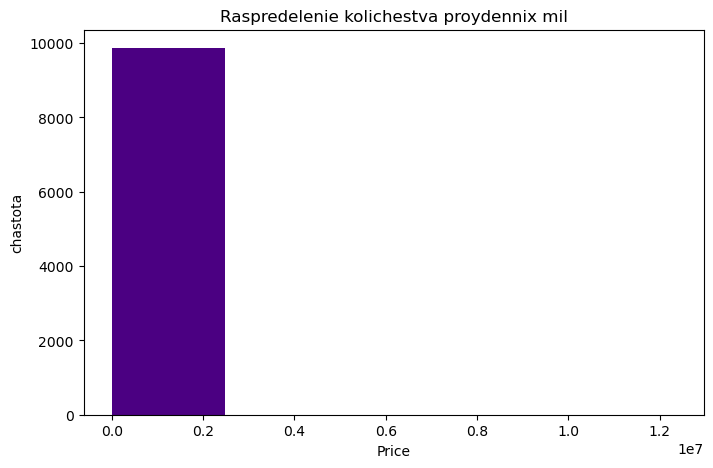

In [3]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=5, color='indigo')
plt.xlabel('Price')
plt.ylabel('chastota')
plt.title('Raspredelenie kolichestva proydennix mil');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

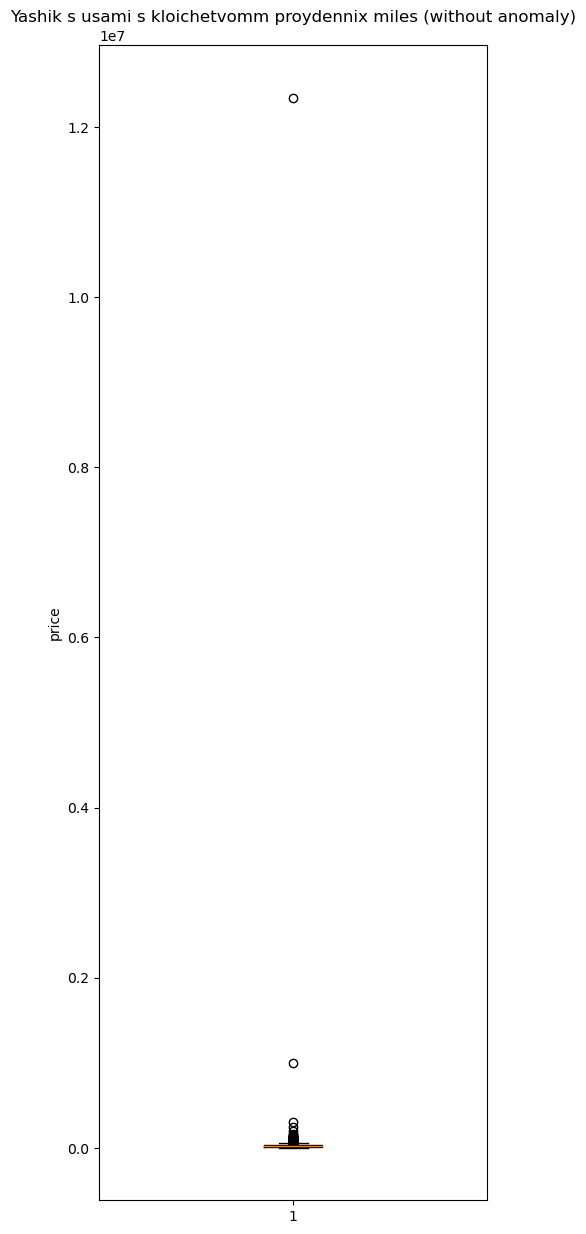

In [4]:
plt.figure(figsize = (5, 15))
plt.boxplot(df.price)
plt.ylabel('price')
plt.title('Yashik s usami s kloichetvomm proydennix miles (without anomaly)');

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [5]:
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [6]:
# Ваш код здесь

import pandas as pd

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

min_price = df['price'].min()
max_price = df['price'].max()

if min_price >= lower_bound and max_price <= upper_bound:
    print("Минимальное и максимальное значения входят в интервал")
else:
    print("Минимальное и/или максимальное значения НЕ входят в интервал")



Нижняя граница: -22485.0
Верхняя граница: 58275.0
Минимальное и/или максимальное значения НЕ входят в интервал


6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [7]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


num_outliers = len(outliers)

print(f"Количество выбросов в стоимости автомобиля: {num_outliers}")


Количество выбросов в стоимости автомобиля: 207


7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [8]:
outliers_sorted = outliers.sort_values(by='price')

print(outliers_sorted)

              id                                                url  \
934   7312212565  https://lasvegas.craigslist.org/cto/d/fresno-d...   
5977  7310551940  https://cincinnati.craigslist.org/ctd/d/camp-d...   
4783  7308933629  https://omaha.craigslist.org/cto/d/cortland-20...   
8050  7307146509  https://lubbock.craigslist.org/ctd/d/brownfiel...   
1253  7313450196  https://lasvegas.craigslist.org/ctd/d/salem-20...   
...          ...                                                ...   
6035  7315323093  https://daytona.craigslist.org/ctd/d/orlando-2...   
290   7310897583  https://tucson.craigslist.org/ctd/d/tucson-201...   
5585  7313998757  https://winchester.craigslist.org/ctd/d/manass...   
9663  7305237859  https://delaware.craigslist.org/cto/d/delaware...   
6239  7302112231  https://akroncanton.craigslist.org/ctd/d/canto...   

                      region                          region_url     price  \
934                las vegas     https://lasvegas.craigslist.org     

8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [9]:


last_15_outliers = outliers_sorted.tail(15)
print(last_15_outliers)


              id                                                url  \
4073  7311841843  https://albuquerque.craigslist.org/ctd/d/albuq...   
1674  7303398175  https://pullman.craigslist.org/cto/d/pullman-6...   
9072  7308732637  https://evansville.craigslist.org/ctd/d/evansv...   
2963  7308463617  https://jacksonville.craigslist.org/cto/d/pont...   
5076  7314445453  https://boston.craigslist.org/gbs/ctd/d/methue...   
6471  7312384300  https://orlando.craigslist.org/ctd/d/orlando-2...   
8904  7314817013  https://sandiego.craigslist.org/csd/ctd/d/dall...   
4183  7316319465  https://portland.craigslist.org/clc/ctd/d/glad...   
8720  7313664504  https://austin.craigslist.org/cto/d/austin-sup...   
9042  7306718413  https://desmoines.craigslist.org/ctd/d/portlan...   
6035  7315323093  https://daytona.craigslist.org/ctd/d/orlando-2...   
290   7310897583  https://tucson.craigslist.org/ctd/d/tucson-201...   
5585  7313998757  https://winchester.craigslist.org/ctd/d/manass...   
9663  

9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [10]:
# Ваш код здесь
import pandas as pd

# Предположим, что df - ваш исходный DataFrame с колонкой price

# Вычисление квартилей
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Вычисление интерквартильного размаха
IQR = Q3 - Q1

# Вычисление границ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов и создание нового DataFrame без аномалий
df_new = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]

# Вывод первых 5 значений нового DataFrame без аномалий
print(df_new.head())


           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [11]:
mean_price_by_year = df_new.groupby('year').agg({'price': 'mean'})

mean_price_by_year = mean_price_by_year.rename(columns={'year': 'year', 'price': 'price'})

print(mean_price_by_year)


             price
year              
1995  13219.472554
1996   9362.960000
1997   6441.250000
1998   6528.672727
1999   7446.641975
2000   7614.410256
2001   7852.090164
2002   7173.798658
2003   7767.962162
2004   7684.105769
2005   8019.770428
2006   8733.512195
2007   8578.738462
2008   9508.803063
2009   9703.035336
2010  11251.862857
2011  13014.494670
2012  14906.807432
2013  16138.114370
2014  18984.084375
2015  22383.042618
2016  23163.207521
2017  26328.875959
2018  28406.824289
2019  31434.111111
2020  33791.940104
2021  23868.250000
2022  15249.000000


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

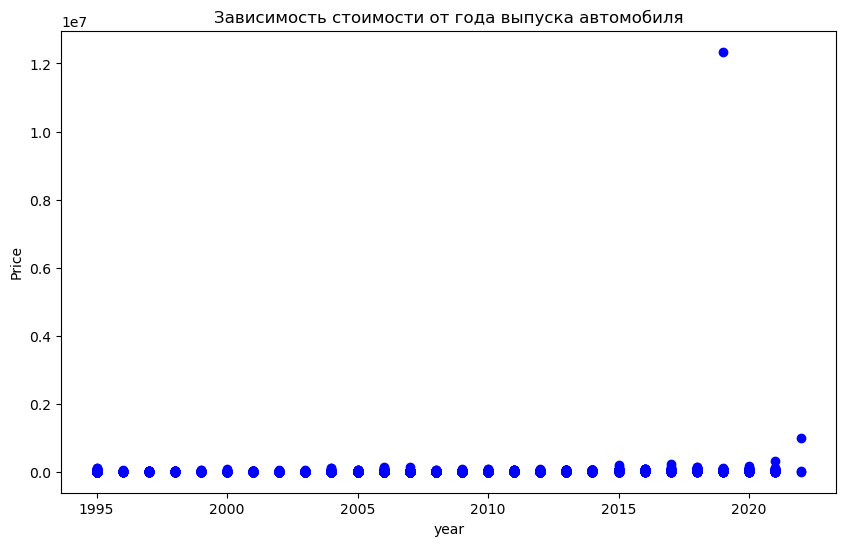

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(df['year'], df['price'], color='blue')

plt.title('Зависимость стоимости от года выпуска автомобиля')
plt.xlabel('year')
plt.ylabel('Price')

plt.show()


3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [13]:
# Ваш код здесь
# Предположим, что df - ваш DataFrame с данными

# Группировка данных по году производства и подсчет количества автомобилей для каждого года
cars_per_year = df.groupby('year').size().reset_index(name='quantity')

# Вывод количества автомобилей для каждого года
print(cars_per_year)


    year  quantity
0   1995       427
1   1996        25
2   1997        44
3   1998        55
4   1999        81
5   2000        79
6   2001       122
7   2002       149
8   2003       185
9   2004       211
10  2005       259
11  2006       291
12  2007       391
13  2008       458
14  2009       284
15  2010       352
16  2011       470
17  2012       593
18  2013       685
19  2014       644
20  2015       664
21  2016       733
22  2017       808
23  2018       799
24  2019       587
25  2020       421
26  2021        48
27  2022         3


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [14]:

df_filtered = df[df['year'] <= 2021]

# Вывод первых пяти значений отфильтрованного датафрейма
print(df_filtered.head())


           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [15]:
mean_price_by_year_filtered = df_filtered.groupby('year').agg({'price': 'mean'}).reset_index()

mean_price_by_year_filtered = mean_price_by_year_filtered.rename(columns={'Year': 'Год производства', 'Price': 'Средняя стоимость'})

print(mean_price_by_year_filtered)


    year         price
0   1995  14583.744731
1   1996   9362.960000
2   1997   6441.250000
3   1998   6528.672727
4   1999   7446.641975
5   2000   8378.784810
6   2001   7852.090164
7   2002   7173.798658
8   2003   7767.962162
9   2004   8897.080569
10  2005   8415.370656
11  2006  10167.264605
12  2007   8889.265985
13  2008   9615.770742
14  2009   9904.785211
15  2010  11626.818182
16  2011  13112.336170
17  2012  15033.423272
18  2013  16335.245255
19  2014  19237.124224
20  2015  23192.846386
21  2016  24054.882674
22  2017  27989.013614
23  2018  29953.883605
24  2019  55839.177172
25  2020  37483.933492
26  2021  38364.937500


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

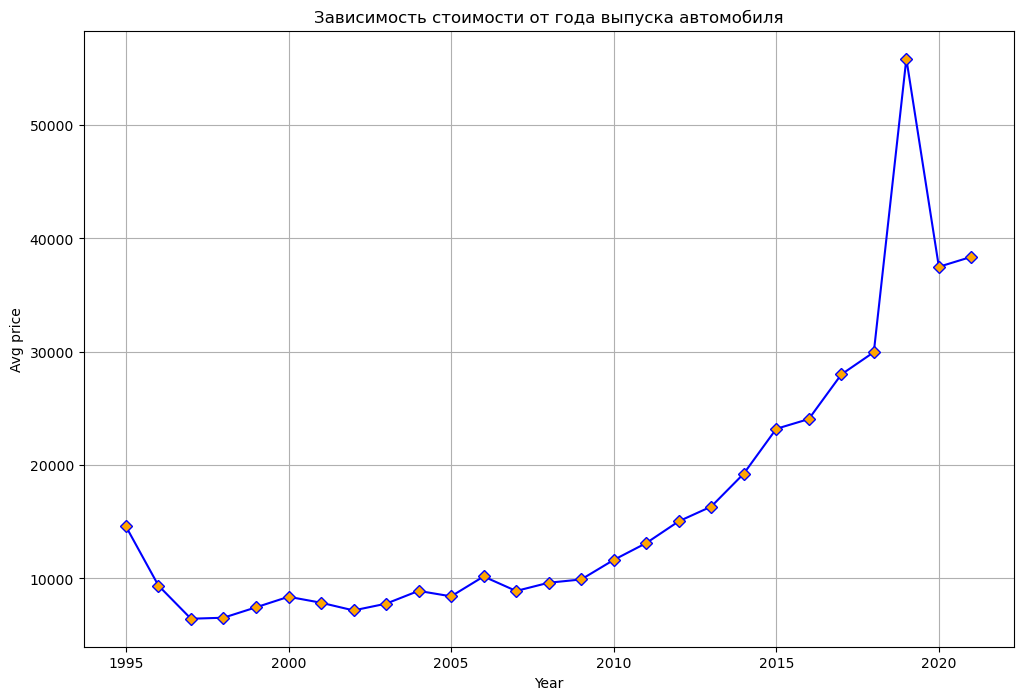

In [16]:
# Ваш код здесь
import matplotlib.pyplot as plt

# Предположим, что mean_price_by_year_filtered - ваш DataFrame со средней стоимостью по годам

# Размер графика
plt.figure(figsize=(12, 8))

# Построение линейного графика
plt.plot(mean_price_by_year_filtered['year'], mean_price_by_year_filtered['price'], marker='D', color='blue', markerfacecolor='orange', linestyle='-')

# Настройка заголовка и подписей осей
plt.title('Зависимость стоимости от года выпуска автомобиля')
plt.xlabel('Year')
plt.ylabel('Avg price')

# Отображение графика
plt.grid(True)
plt.show()


7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: __

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: __

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: __

In [17]:

correlation = df['price'].corr(df['year'])

print(f"Коэффициент корреляции Пирсона: {correlation}")
print('Too low correaltion coefficient')

Коэффициент корреляции Пирсона: 0.07276283271737848
Too low correaltion coefficient


8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

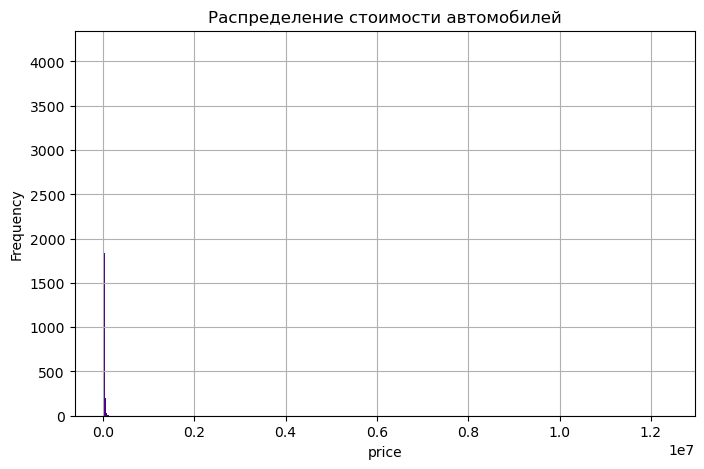

In [18]:
plt.figure(figsize=(8, 5))

plt.hist(df_filtered['price'], bins=1000, color='indigo')

# Настройка заголовка и подписей осей
plt.title('Распределение стоимости автомобилей')
plt.xlabel('price')
plt.ylabel('Frequency')

# Отображение гистограммы
plt.grid(True)
plt.show()



9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [19]:
df_new.to_csv('data/vehicles_dataset_upd2.csv', index=False)


### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


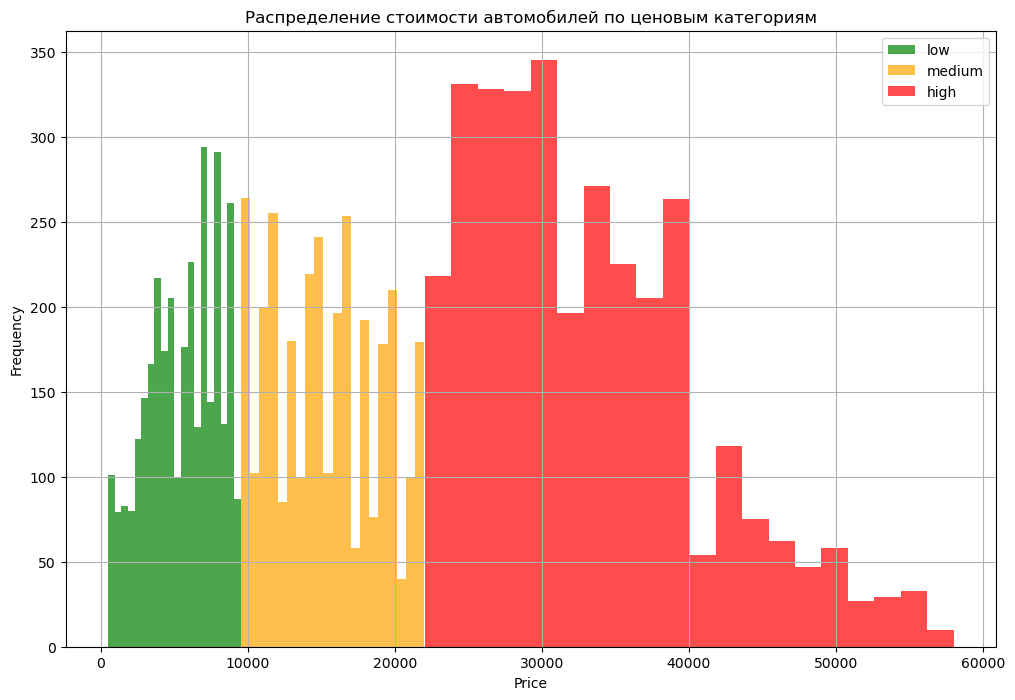

In [20]:

plt.figure(figsize=(12, 8))
color_map = {'low': 'green', 'medium': 'orange', 'high': 'red'}

for category, color in color_map.items():
    subset = df_new[df_new['price_category'] == category]
    plt.hist(subset['price'], bins=20, alpha=0.7, color=color, label=category)

plt.title('Распределение стоимости автомобилей по ценовым категориям')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend() 
plt.grid(True)
plt.show()


2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

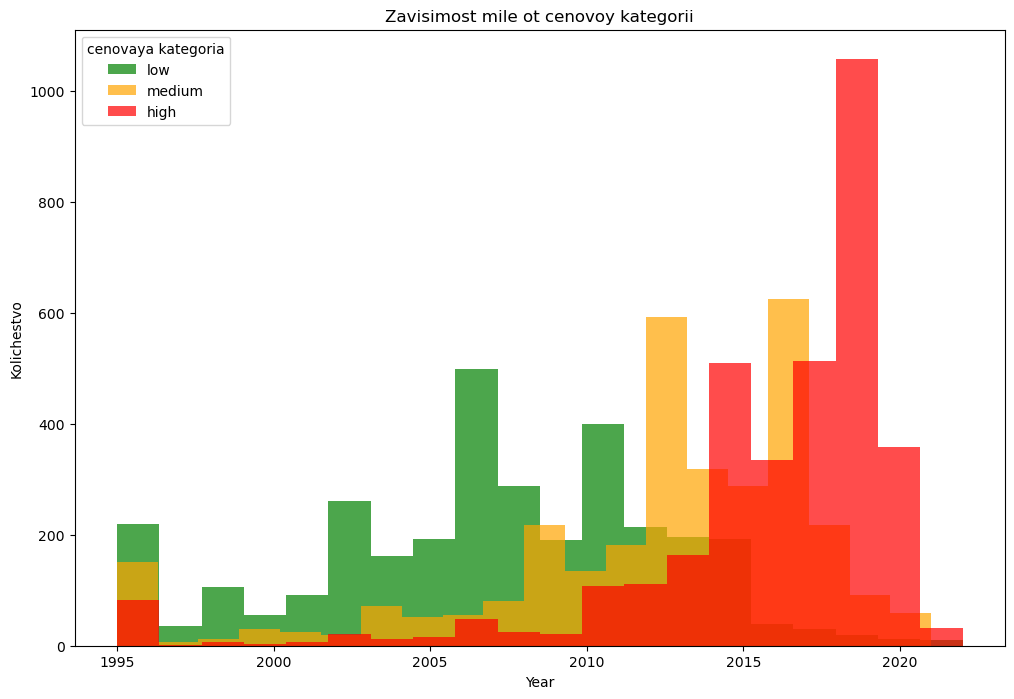

In [21]:
colors= {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12,8))
for price_category in colors:
    color= colors[price_category]
    data = df[df['price_category'] == price_category]
    
    ax.hist(data['year'], bins=20, color=color, alpha=0.7)


plt.xlabel('Year')
plt.ylabel('Kolichestvo')
plt.title('Zavisimost mile ot cenovoy kategorii')
plt.legend(colors, title='cenovaya kategoria');

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [48]:
transmission_stats = df.groupby('manufacturer').size().reset_index(name='quantity')

transmission_stats.columns = ['manufacturer', 'quantity']

# Отображение нового DataFrame
print(transmission_stats)


       manufacturer  quantity
0             acura       149
1        alfa-romeo        13
2              audi       199
3               bmw       311
4             buick       145
5          cadillac       182
6         chevrolet      1286
7          chrysler       160
8            datsun         2
9             dodge       325
10          ferrari         4
11             fiat        23
12             ford      1626
13              gmc       356
14  harley-davidson         4
15            honda       461
16          hyundai       221
17         infiniti       117
18           jaguar        44
19             jeep       487
20              kia       198
21            lexus       175
22          lincoln       111
23            mazda       142
24    mercedes-benz       231
25          mercury        32
26             mini        69
27       mitsubishi        82
28           nissan       452
29            other       345
30          pontiac        61
31          porsche        36
32        

2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

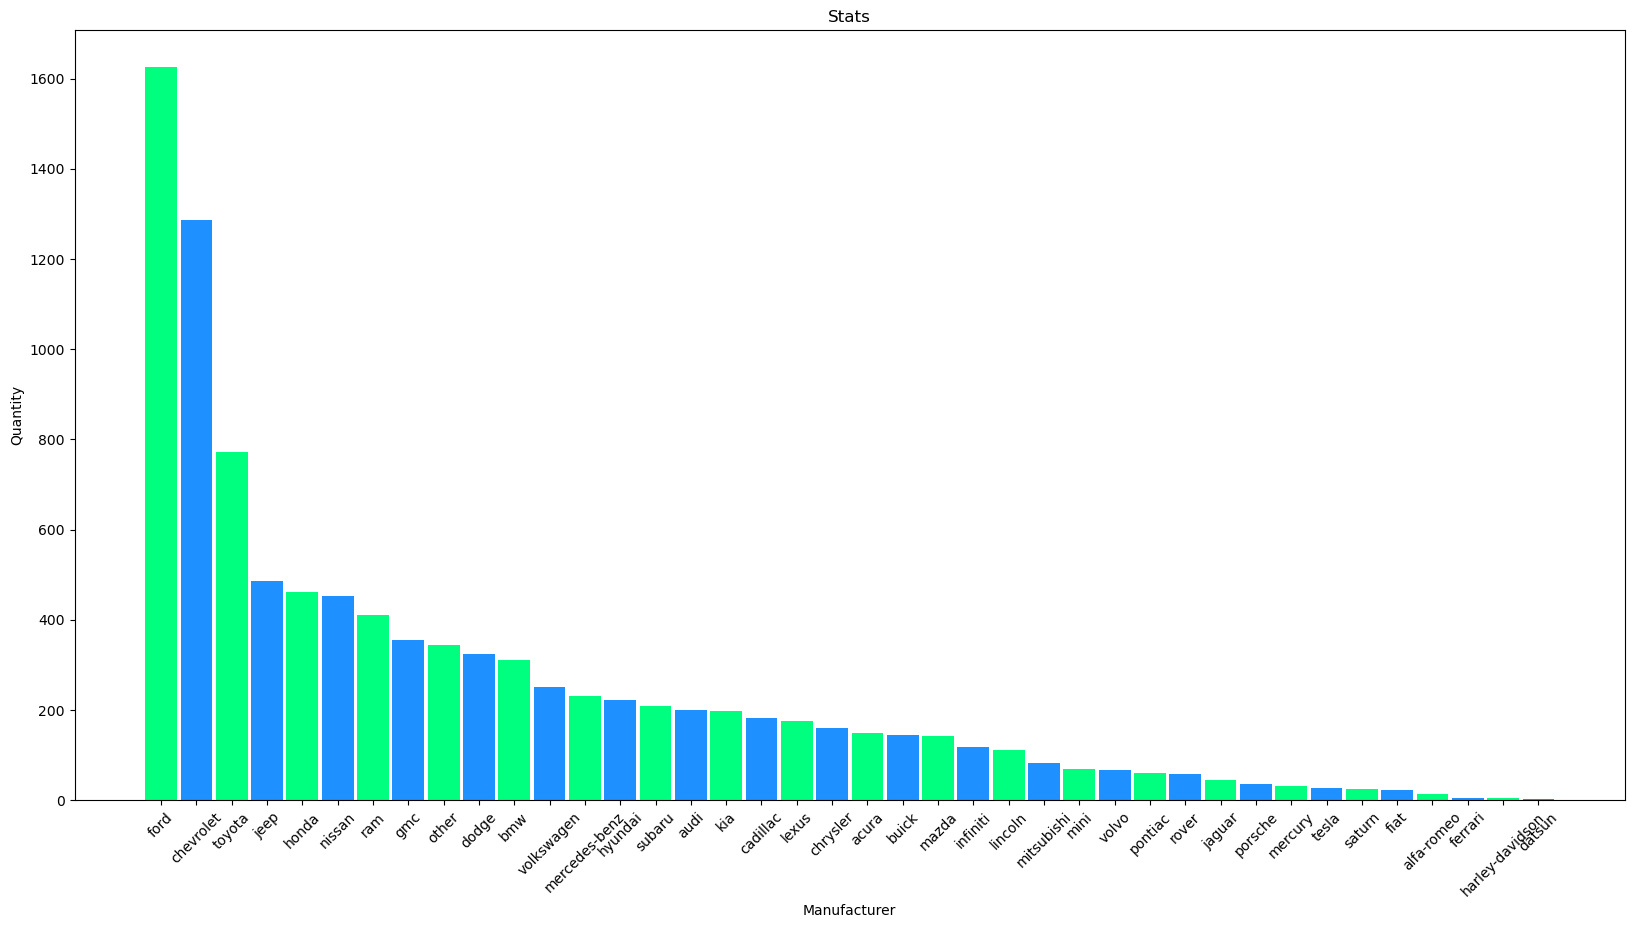

In [40]:
import matplotlib.pyplot as plt

manufacturer_counts = df['manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer', 'quantity']

plt.figure(figsize=(20, 10))

manufacturers = manufacturer_counts['manufacturer']
counts = manufacturer_counts['quantity']  

colors = ['springgreen', 'dodgerblue']

plt.bar(manufacturers, counts, width=0.9, color=colors)

# Настройка осей и заголовка
plt.xlabel('Manufacturer')
plt.ylabel('Quantity')
plt.title('Stats')
plt.xticks(rotation=45)  # Поворот подписей на оси X на 45 градусов

# Отображение графика
plt.show()


3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [41]:
transmission_stats = df.groupby('transmission').size().reset_index(name='Количество_автомобилей')

transmission_stats.columns = ['transmission', 'quantity']

# Отображение нового DataFrame
print(transmission_stats)


  transmission  quantity
0    automatic      7577
1       manual       626
2        other      1665


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


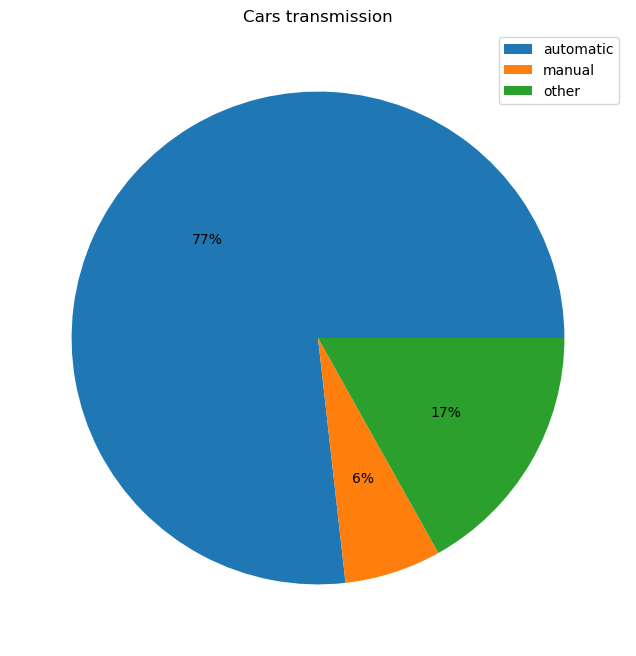

In [51]:
stats = df.groupby(['transmission'], as_index=False)[['id']].count()
stats = stats.rename(columns={'id': 'count'})
stats

plt.figure(figsize=(12, 8))
plt.pie( stats['count'], labels=stats['transmission'], labeldistance=None, autopct= '%1.0f%%')
plt.title('Cars transmission')
plt.legend()
plt.show();